In [1]:
import numpy as np
import scipy
from scipy import linalg
from scipy import optimize
from scipy import stats
import matplotlib.pyplot as plt
import math

# 9. Numpy
## 9.5. Singular values

In [2]:
n = 200
p= .5
C = np.random.binomial(1, p ,size= (n, n))
print(C)
U,S,V = linalg.svd(C)
print(max(S))

[[1 1 1 ... 0 1 1]
 [0 0 1 ... 0 0 1]
 [0 1 1 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [1 1 1 ... 0 1 0]
 [0 1 1 ... 1 1 0]]
99.8692855848552


The largest singular value is similar to n*p

# 10. Scipy
## 10.1. Least squares

In [3]:
n,m=100,200
A = np.random.normal(0, 1, (m, n))
b= np.random.normal(0, 1,  m)
x = linalg.lstsq(A, b,)[0]
np.argmin(x)

3

## 10.2. Optimization

In [5]:
def fun(x):
    return (math.sin(x-2) ** 2) * math.exp(-x**2)

fun1=np.vectorize(fun)
x = np.linspace(-5,5)
a = optimize.fsolve(fun1,x) 
a.max()

42.206731248238405

## 10.3. Pairwise distances

In [6]:
n=10
m=10
X= np.random.normal(0, 1, (m, n))
distance = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        distance[i,j]= np.absolute(linalg.norm(X[i]-X[j])) # distance of ith row and jth row
distance

array([[0.        , 5.09311828, 4.33285059, 4.11673791, 3.60408714,
        3.68740373, 6.06804215, 5.25781985, 4.72760855, 4.4463039 ],
       [5.09311828, 0.        , 2.98396646, 3.58935449, 4.07947141,
        5.23300782, 4.82097072, 3.87722728, 3.97528552, 4.19392624],
       [4.33285059, 2.98396646, 0.        , 4.16478198, 2.7263817 ,
        4.63922617, 4.9393598 , 4.42477639, 3.13849603, 4.05342305],
       [4.11673791, 3.58935449, 4.16478198, 0.        , 3.9615032 ,
        4.72256301, 5.56518821, 5.16068193, 4.28605252, 4.74537961],
       [3.60408714, 4.07947141, 2.7263817 , 3.9615032 , 0.        ,
        4.23723846, 5.40266486, 4.92549349, 3.36023624, 4.05656499],
       [3.68740373, 5.23300782, 4.63922617, 4.72256301, 4.23723846,
        0.        , 5.54735735, 4.27751322, 4.1016492 , 4.46040786],
       [6.06804215, 4.82097072, 4.9393598 , 5.56518821, 5.40266486,
        5.54735735, 0.        , 4.54627029, 5.27223415, 2.99510034],
       [5.25781985, 3.87722728, 4.4247763

# 11. Matploit
## 11.1. Plotting a function

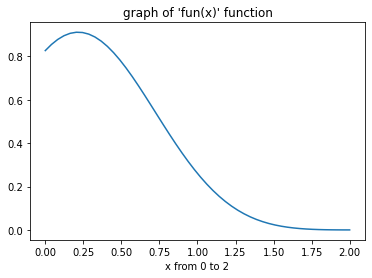

In [7]:
def fun(x):
    return (math.sin(x-2) ** 2) * math.exp(-x**2)

fun1=np.vectorize(fun)
x= np.linspace(0,2)
a = scipy.optimize.fsolve(fun,6) 
plt.plot(x,fun1(x))
plt.xlabel('x from 0 to 2') 
plt.title("graph of 'fun(x)' function")
plt.show()

## 11.2.  Data

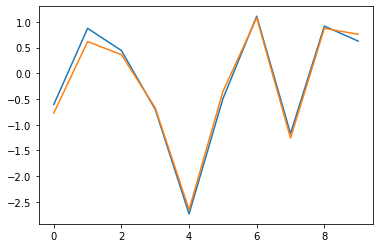

In [8]:
X= np.random.normal(0, 1, (20, 10))
b= np.random.normal(0,1, 10)
z=np.random.normal(0, 1, 20)
y= X@b + z

b1 = linalg.lstsq(X, y,)[0]

plt.plot(b1)
plt.plot(b)


## 11.3. Histogram and density estimation

(array([ 311.,  399.,  408.,  491.,  595.,  745.,  947., 1040., 1348.,
        3716.]),
 array([0.00049047, 0.03939141, 0.07829234, 0.11719328, 0.15609421,
        0.19499514, 0.23389608, 0.27279701, 0.31169795, 0.35059888,
        0.38949982]),
 <BarContainer object of 10 artists>)

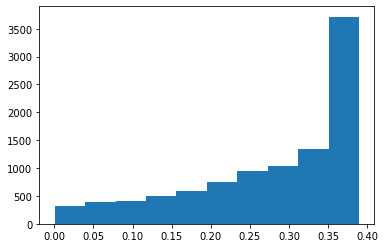

In [9]:
z=np.random.normal(0,1, 10000)
positions = np.vstack([z.ravel()])
kernel =stats.gaussian_kde(z)
Z = np.reshape(kernel(positions).transpose(), z.shape)

counts, bins = np.histogram(Z)
plt.hist(bins[:-1], bins, weights=counts)